In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('suicide_detection_final_cleaned.csv')
df.head()

,text,class,cleaned_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suiciderecently leave wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird not affect compliment come know irl feel...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally hear bad year swear fucking god annoying
3,i need helpjust help me im crying so hard,suicide,need helpjust help cry hard
4,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonight not anymore quit


### Converting the fields suicide and non-suicide to 0 and 1

In [3]:
df['class']=df['class'].apply(lambda x: 1 if x=='suicide' else 0)
df['cleaned_text'] = df['cleaned_text'].astype('U')
df.dtypes

text            object
class            int64
cleaned_text    object
dtype: object

### Counting the suicide and non-suicide classes (checking class balance)

In [4]:
df['class'].value_counts()

class
0    107066
1     67902
Name: count, dtype: int64

## Import dependencies related to model training
#### Now I have to divide the data for training and testing, afterwards I need to vectorize the text

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['class'])

### In order to train the model One has to vectorize the data 

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

### Training the model with the training data already vectorized

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth = 5, n_estimators = 5, learning_rate = 0.1)
model.fit(X_train_count,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=5)

### Testing the model: X_test

In [28]:
X_test_count = v.transform(X_test)
y_pred = model.predict(X_test_count)
y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

In [32]:
model.score(X_test_count,y_test)

0.8027525033148919

### Lets try some manual predictions to see how

In [29]:
text_test = ['I wanna die',
             'My life has no meaning', 
             'My next vacation trip will be awesome',
             'I enjoy everything, my family, my cats, my kids',
             'I love my dog',
             'What the fuck dude',
             'Why to continue living',
             'What happened to your mom, She died?'
             ]
# in order to pass text_test to the model it has to be vectorized
text_test_count = v.transform(text_test)
model.predict(text_test_count)

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### I have to do hyperparameter tunning here
##### So far I am getting a score of 84 % percent with GBM, I suppose that I make hyperparameter tunning this should increase considerably 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
LR = {
    'learning_rate':[0.05,0.1,0.5], 
    'n_estimators':[50,100]
}
model_tunning = GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = LR,scoring='precision')
model_tunning.fit(X_train_count,y_train)
model_tunning.best_params_, model_tuning.best_score_

In [16]:
y_pred_tunning = model_tuning.predict(X_test_count)
y_pred_tunning

array([0.14279648, 0.14279648, 0.77431247, ..., 0.21550581, 0.92215024,
       0.35081735])

In [ ]:
model_tunning1 = GradientBoostingClassifier(max_depth = 40, n_estimators = 40, learning_rate = 0.1)
model_tunning1.fit(X_train_count,y_train)

In [20]:
y_pred_tunning1 = model_tunning1.predict(X_test_count)
y_pred_tunning1

array([0.12098381, 0.08679801, 0.98283046, ..., 0.08199011, 0.97807989,
       0.1446974 ])

In [22]:
model_tunning2 = GradientBoostingClassifier(max_depth = 60, n_estimators = 40, learning_rate = 0.1)
model_tunning2.fit(X_train_count,y_train)

GradientBoostingRegressor(max_depth=60, n_estimators=40)

In [23]:
y_pred_tunning2 = model_tunning2.predict(X_test_count)
y_pred_tunning2

array([0.02085221, 0.07405119, 0.99004634, ..., 0.02472522, 0.98637058,
       0.02817023])

In [44]:
model_tunning3 = GradientBoostingClassifier(max_depth = 60, n_estimators = 60, learning_rate = 0.1)
model_tunning3.fit(X_train_count,y_train)

GradientBoostingClassifier(max_depth=60, n_estimators=60)

In [45]:
y_pred_tunning3 = model_tunning3.predict(X_test_count)
y_pred_tunning3

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
import pickle
with open('GBM-ModelTunning3','wb') as f:
    pickle.dump(model,f)

In [ ]:
with open('GBM-ModelTunning3','rb') as f:
    model = pickle.load(f)

### Metrics analysis

####  all dependencies related to metrics

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import log_loss

In [51]:
print("accuracy: ", accuracy_score(y_test,y_pred_tunning3))
print("precision_score:", precision_score(y_test,y_pred_tunning3))
print("recall_score: ", recall_score(y_test,y_pred_tunning3))
print("f1_score: ", f1_score(y_test,y_pred_tunning3))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred_tunning3))

accuracy:  0.8754057884870377
precision_score: 0.8653614648672623
recall_score:  0.804215980686569
f1_score:  0.8336690471830556
roc_auc_score:  0.8624017232929463


In [49]:
confusion_matrix(y_test,y_pred_tunning3)

array([[24634,  2125],
       [ 3325, 13658]], dtype=int64)

### Visualizing the confusion matrix

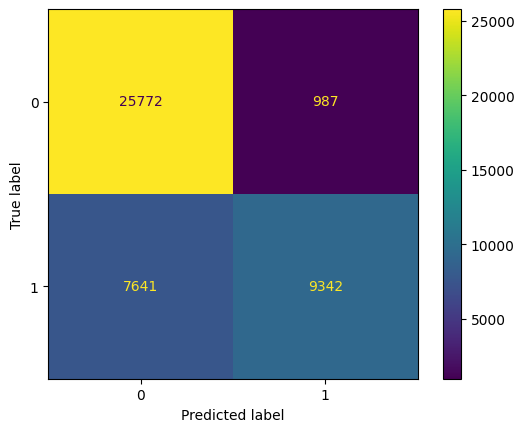

In [52]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

### Creating Data Balance  - Subsampling

In [53]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]
size = df_1['class'].size
size

67902

In [54]:
# Now I have to subsample the greater dataset to n = size of the smaller one
df_00 = df_0.sample(n=size, replace=False, random_state=0)
subsample_df = pd.concat([df_00, df_1])
# now the data is balanced by the subsampling method
subsample_df['class'].value_counts()

class
0    67902
1    67902
Name: count, dtype: int64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(subsample_df['cleaned_text'], subsample_df['class'])

In [56]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [57]:
model_tunning3 = GradientBoostingClassifier(max_depth = 60, n_estimators = 60, learning_rate = 0.1)
model_tunning3.fit(X_train_count,y_train)

GradientBoostingClassifier(max_depth=60, n_estimators=60)

In [58]:
model_tunning3.score(X_train_count, y_train)

0.9897990240837286

In [ ]:
X_test_count = v.transform(X_test)
## Checking the score of the model against test data
model_tunning3.score(X_test_count, y_test)

In [59]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred = model_tunning3.predict(X_test_count)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
print("accuracy: ", accuracy_score(y_test,y_pred))
print("precision_score:", precision_score(y_test,y_pred))
print("recall_score: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred))

accuracy:  0.8672498600924863
precision_score: 0.8817368936795689
recall_score:  0.8482295410357626
f1_score:  0.8646587189573887
roc_auc_score:  0.8672470593622681


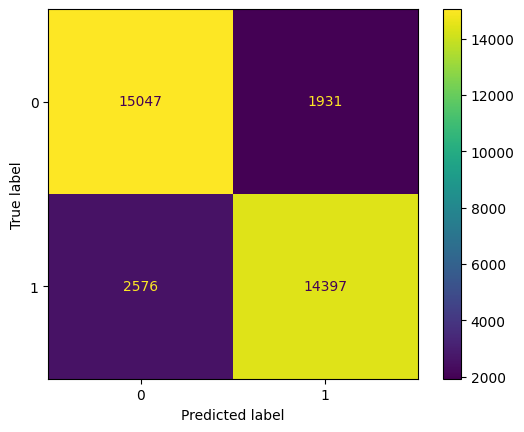

In [61]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [70]:
import pickle
with open('GBM_Subsampling','wb') as f:
    pickle.dump(model_tunning3,f)

### Creating Data Balance - oversampling

In [8]:
df_0 = df[df['class']==0]
df_1 = df[df['class']==1]

In [9]:
size = df_0['class'].size
size

107066

In [10]:
df_1 = df_1.sample(n=size, replace=True, random_state=0)
oversample_df = pd.concat([df_0, df_1])

In [11]:
# now the data is balanced by the subsampling method
oversample_df['class'].value_counts()

class
0    107066
1    107066
Name: count, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(oversample_df['cleaned_text'], oversample_df['class'])

In [13]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)

In [15]:
from sklearn.ensemble import GradientBoostingClassifier 
model_tunning4 = GradientBoostingClassifier(max_depth = 60, n_estimators = 60, learning_rate = 0.1)
model_tunning4.fit(X_train_count,y_train)

GradientBoostingClassifier(max_depth=60, n_estimators=60)

In [16]:
model_tunning4.score(X_train_count, y_train)

0.9906475133718142

In [17]:
X_test_count = v.transform(X_test)
## Checking the score of the model against test data
model_tunning4.score(X_test_count, y_test)

0.9228700054172193

In [23]:
# returns an array of the predicted values
X_test_count = v.transform(X_test)
y_pred_tunning4 = model_tunning4.predict(X_test_count)
y_pred_tunning4

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [24]:
print("accuracy: ", accuracy_score(y_test,y_pred_tunning4))
print("precision_score:", precision_score(y_test,y_pred_tunning4))
print("recall_score: ", recall_score(y_test,y_pred_tunning4))
print("f1_score: ", f1_score(y_test,y_pred_tunning4))
print("roc_auc_score: ", roc_auc_score(y_test,y_pred_tunning4))

accuracy:  0.9228700054172193
precision_score: 0.9151096071796381
recall_score:  0.9318003071046028
f1_score:  0.92337953942363
roc_auc_score:  0.922891805311395


In [34]:
text_test = ['I want to die',
             'My life has no meaning', 
             'My dog died',
             'I feel depressed and want to end it',
            ]
# In order to pass text_test to the model it has to be vectorized
text_test_count = v.transform(text_test)
model_tunning4.predict(text_test_count)

array([1, 1, 0, 1], dtype=int64)

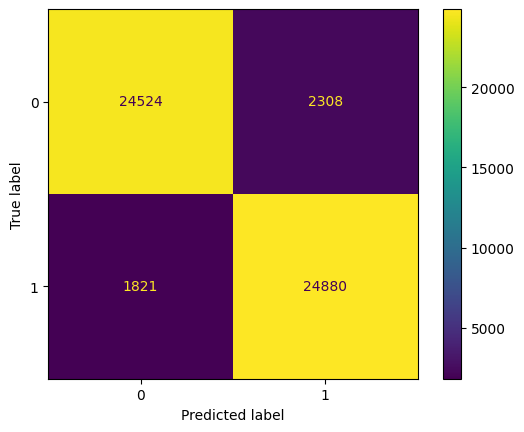

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=model_tunning4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_tunning4.classes_)
disp.plot()
plt.show()